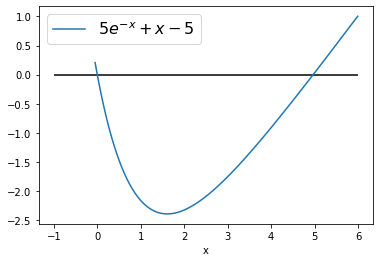

In [1]:
#Exercise 1:

#c)

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import e

def f(x): 
    return 5 * (e ** -x) + x - 5

# generate fine list of numbers for plotting
x = np.arange(-0.05, 6, 0.01)

# plot the left side of the equation
plt.plot(x, 5 * (e ** -x) + x - 5, label=r'$5e^{-x} + x - 5$')



# make a nice axis label and legend
plt.xlabel("x")
plt.legend(loc='upper left', fontsize=16, labelspacing=0.3)

plt.hlines(0, -1, 6)


# this displays all components of the plot
plt.show()

#The two roots seem to be 0 and 5. I think the zero root seems is not physical because it would mean that
#either h or c (from the numerator of the original fraction that x replaced) are zero and that isn't possible 
#since they are both constants. Any of the values in the denominator being zero are either trivial or not possible
#so the 0 root is the nonphysical one. 

In [2]:
#d)

from scipy import optimize as sp

x = (sp.bisect(f, 4, 6))

print('Root =', x)


Root = 4.965114231743428


In [3]:
#e)

#T = b/lambda

#lambda = 502nm = 502e-9 meters

h = 6.62607015e-34 #Planck's Constant in units of J*s
c = 3e8 #speed of light in vacuum in units of m/s
k = 1.38064852e-23 #Boltzmann's Constant in units of m^2 * kg/s^2 * K

b = (h * c) / (k * x)
T = b/502e-9 

print('Temperature at the surface of the sun =', T, 'Kelvin')

Temperature at the surface of the sun = 5776.45228906562 Kelvin


In [4]:
#Exercise 2:

#b)

V_plus = 5 #volts
R1, R2, R3, R4 = 1, 4, 3, 2 #kilohms
I_0 = 3 #nA (nanoAmperes)
V_T = 0.05 #volts
#E1 = e ** ((V1 - V2) / V_T)
#E2 = e ** ((V2 - V1) / V_T)

def f1(V1, V2):
    return(((V1 + V_plus) / R1) + (V1 / R2) + (I_0 * (e ** ((V1 - V2) / V_T) - 1)))

def f2(V2, V1):
    return(((V2 + V_plus) / R3) + (V2 / R4) + (I_0 * (e ** ((V2 - V1) / V_T) - 1)))

def deriv_f1_V1(V1, V2):
    return((1 / R1) + (1 / R2) + I_0 * (e ** ((V1 - V2) / V_T) / V_T))

def deriv_f1_V2(V1, V2):
    return(-I_0 * (E1 / V_T))

def deriv_f2_V2(V1, V2):
    return((1 / R3) + (1 / R4) + I_0 * (e ** ((V2 - V1) / V_T) / V_T))

def deriv_f2_V1(V1, V2):
    return(-I_0 * (E2 / V_T))

V1, V2 = 2.5, 2.5
compare_V = 5
counter = 0
accuracy = 1e-10

while(abs(V1-compare_V) > accuracy):
    counter += 1
    compare_V = V1
    V1 = V1 - f1(V1, V2)/deriv_f1_V1(V1, V2)
    
while(abs(V2-compare_V) > accuracy):
    counter += 1
    compare_V = V2
    V2 = V2 - f2(V1, V2)/deriv_f2_V2(V1, V2)

print("Newton's method converged to", V1, 'and', V2, 'after', counter, 'iterations')
print('The likely values of V1 and V2 are', V1, 'and', V2, 'respectively')

Newton's method converged to -1.6000000000000003 and 2.5 after 6 iterations
The likely values of V1 and V2 are -1.6000000000000003 and 2.5 respectively


In [5]:
#c)
#This should be the voltage across the diode (~0.6 volts)
print('Voltage across diode =', 5 - abs(V1 - V2))

Voltage across diode = 0.8999999999999995
